In [3]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [42]:
# Read a CSV file from Google Drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


file_path = "/content/drive/MyDrive/BrentOilPrices.csv"
df = pd.read_csv(file_path)


In [43]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


/tmp/ipython-input-579959469.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [51]:
df.describe()

,Price,Log_Returns
count,9011.000000,9010.000000
mean,48.420782,0.000179
std,32.860110,0.025532
min,9.100000,-0.643699
25%,19.050000,-0.011154
50%,38.570000,0.000402
75%,70.090000,0.012127
max,143.950000,0.412023


In [52]:
df.isnull().sum()

,0
Price,0
Log_Returns,1


In [44]:
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


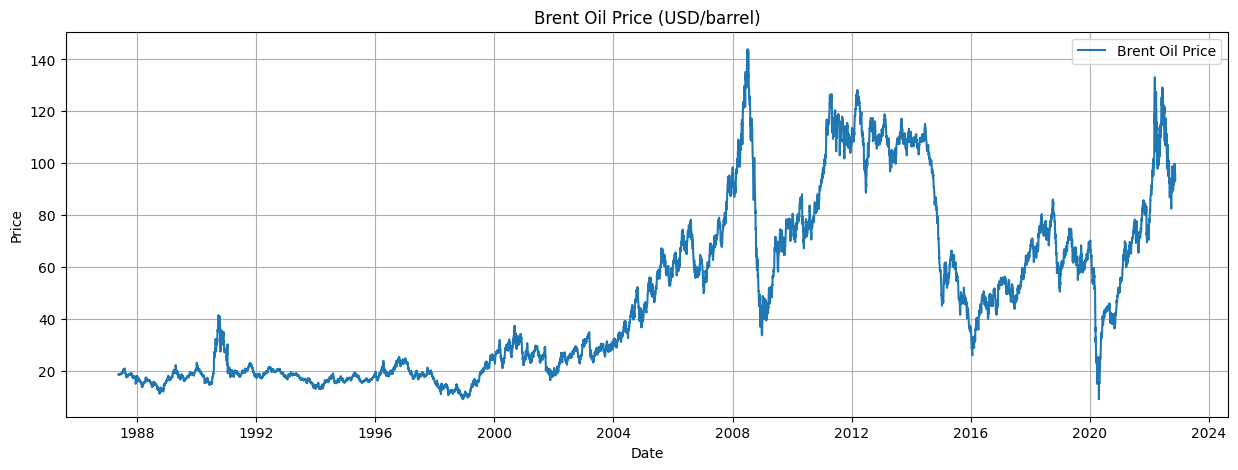

In [45]:
plt.figure(figsize=(15,5))
plt.plot(df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Price (USD/barrel)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.9938560113924666
p-value: 0.2892735048934033


In [48]:
import numpy as np
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))
df['Log_Returns'].dropna(inplace=True)

In [49]:
df.head()

,Price,Log_Returns
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612


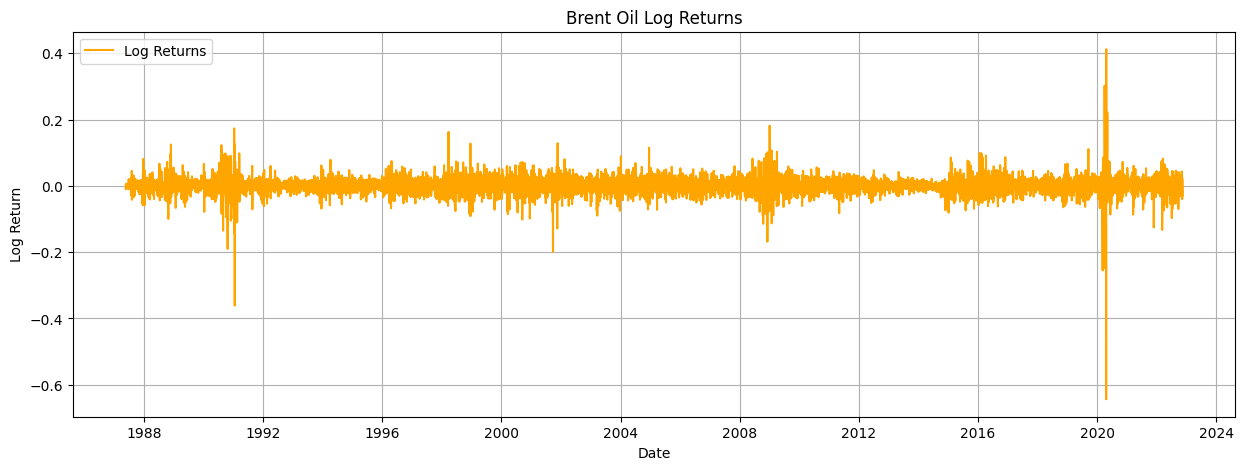

In [50]:
# Plot log returns
plt.figure(figsize=(15,5))
plt.plot(df['Log_Returns'], label='Log Returns', color='orange')
plt.title('Brent Oil Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()